In [1]:
# load repository
import os
import sys
import yaml
!git clone 'https://github.com/calebyung/Manulife-Case-Study'
os.chdir("Manulife-Case-Study")
sys.path.append('Manulife-Case-Study')
from src.feature_engineering import *
from src.modelling import *
from src.eda import *
params = yaml.safe_load(open('config.yml'))

Cloning into 'Manulife-Case-Study'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 100 (delta 40), reused 83 (delta 26), pack-reused 0
Receiving objects: 100% (100/100), 15.83 KiB | 2.64 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [2]:
# read raw data
data = pd.read_excel(params['data_path'])
# clean up column names
data.columns = [c.replace(' ','_').replace('.','').lower() for c in data.columns]
# convert active_customer_index to churn_in_6m
data = data.rename(columns={'active_customer_index':'churn_in_6m'})
data.churn_in_6m = data.churn_in_6m.map({0:1, 1:0})
data.churn_in_6m = np.select([((data.index%10==0) & (data.churn_in_6m==0)), ((data.index%10==0) & (data.churn_in_6m==1)), True],[1,0,data.churn_in_6m])
# sort data by client_id
data = data.sort_values('client_id').reset_index(drop=True)

,Column Name,Percentage Missing
0,client_id,0.000000
1,sex,0.002633
2,industry,0.089633
3,year_of_birth,0.000000
4,join_date,0.000000
5,with_product_a,0.000000
6,with_product_b,0.000000
7,total_aum,0.000000
8,no_of_transaction,0.000000
9,income,0.000000


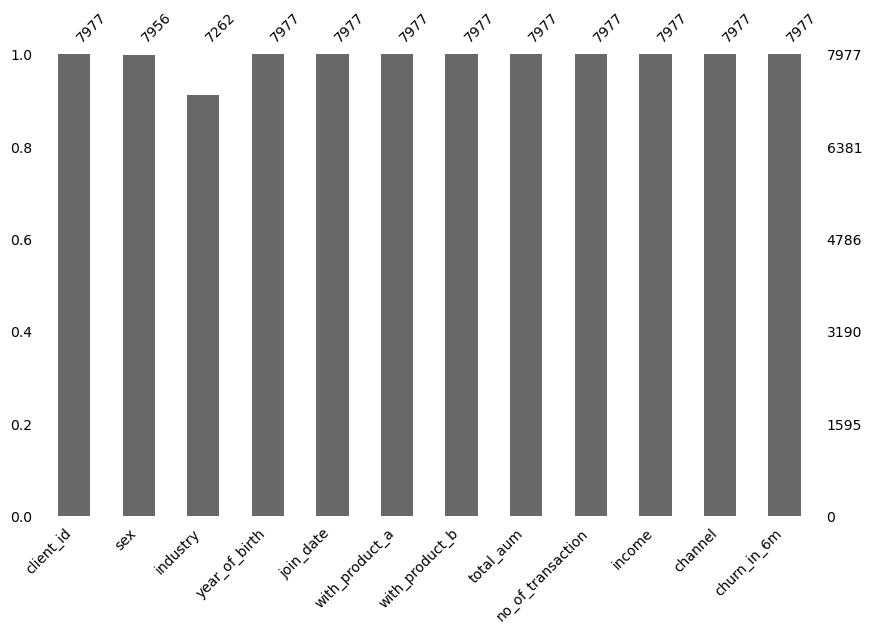

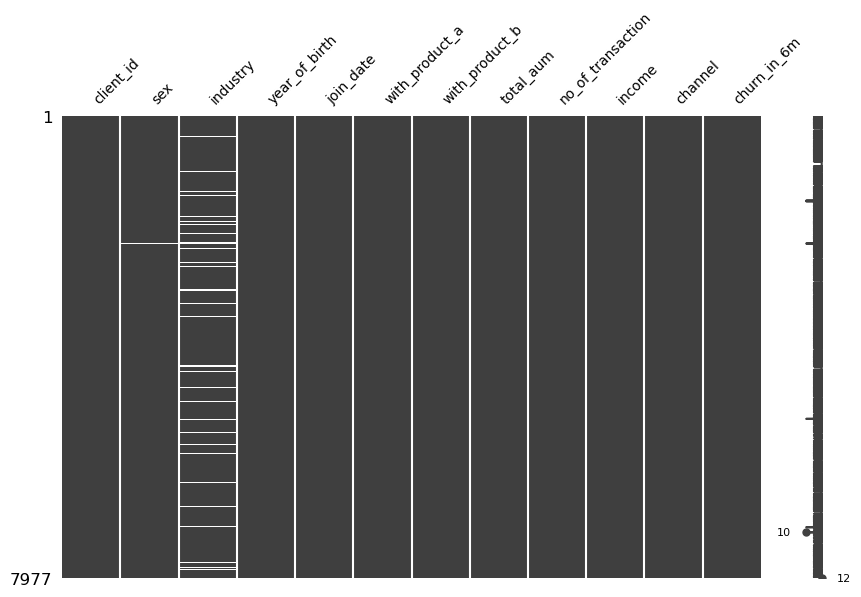

In [3]:
eda = EDA(params, data)
eda.plot_missing_values()

<Figure size 640x480 with 0 Axes>

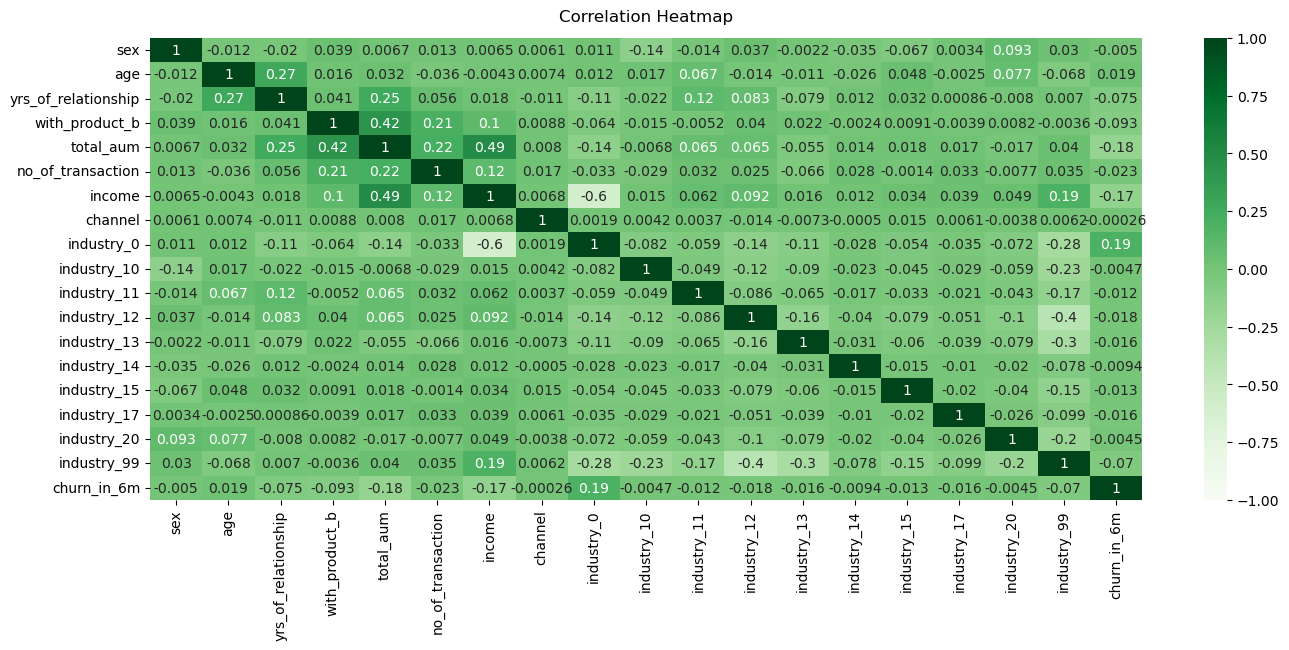

In [4]:
eda.plot_feature_correlation()

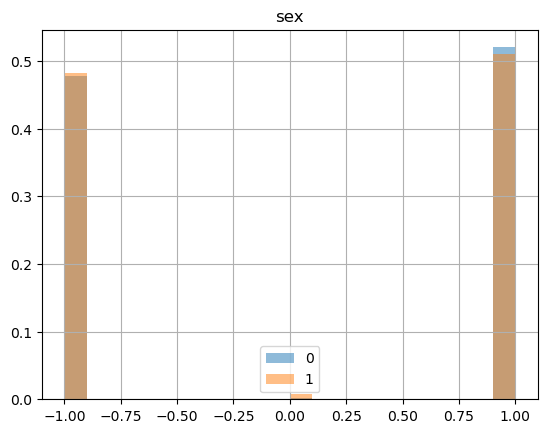

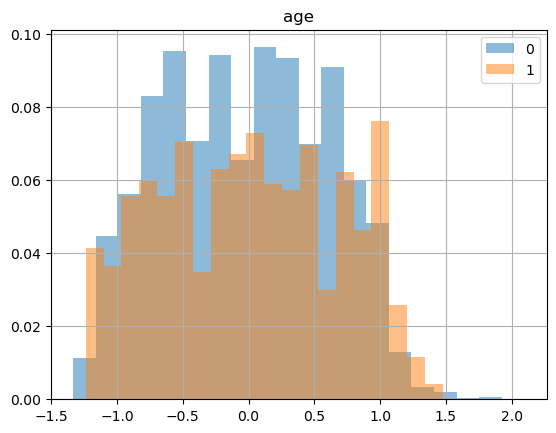

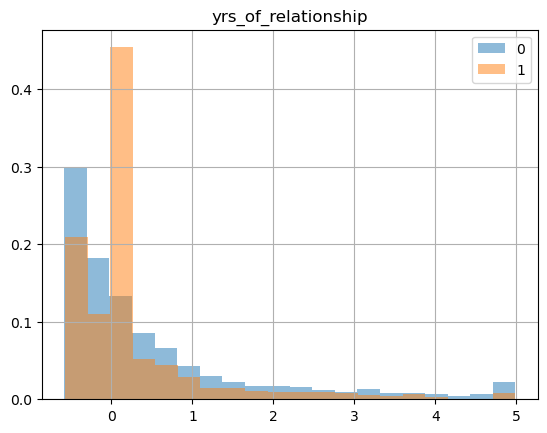

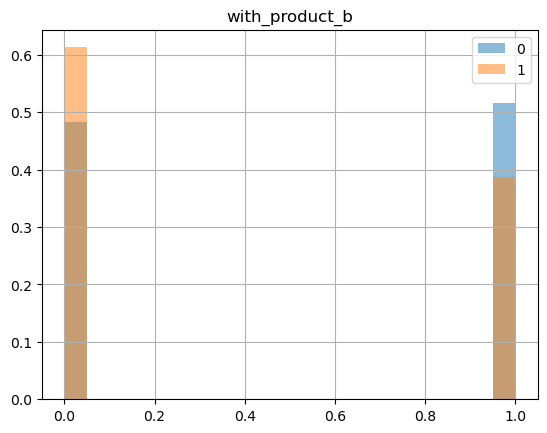

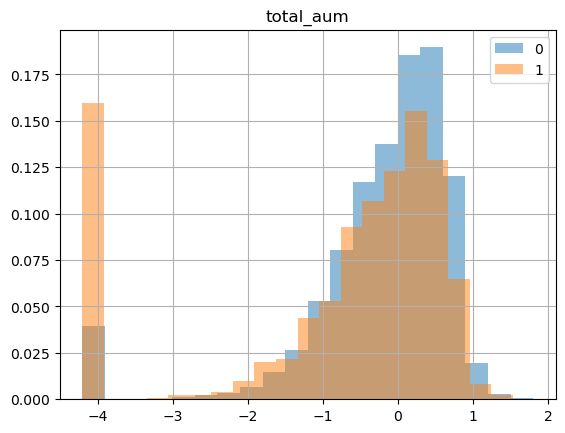

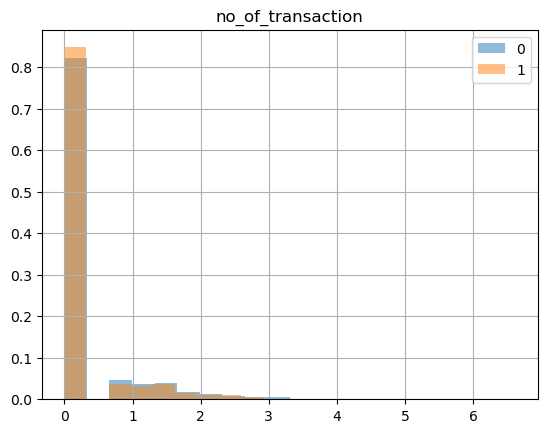

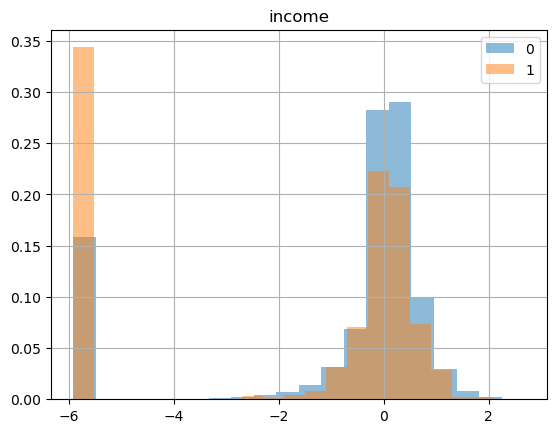

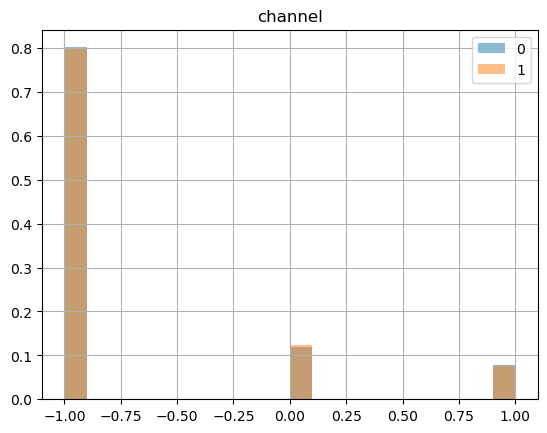

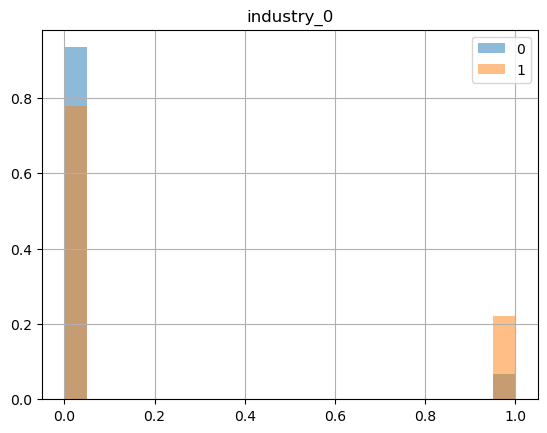

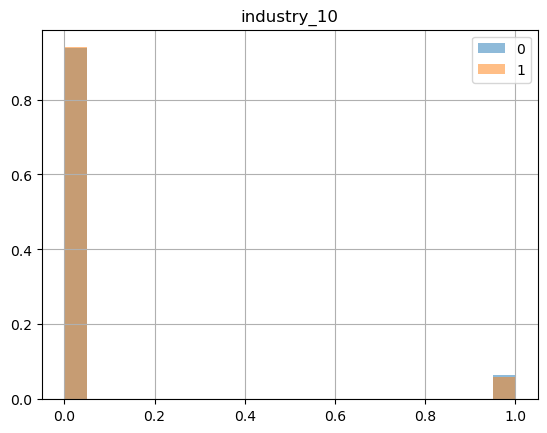

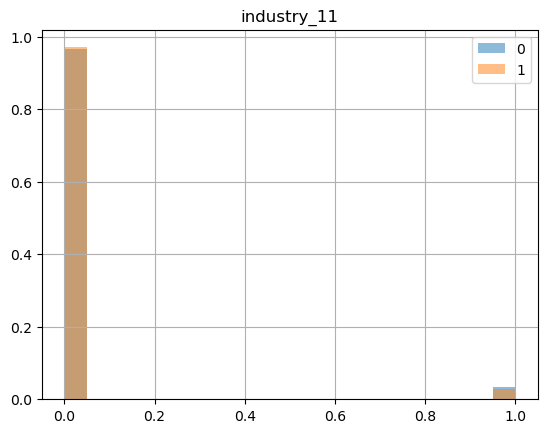

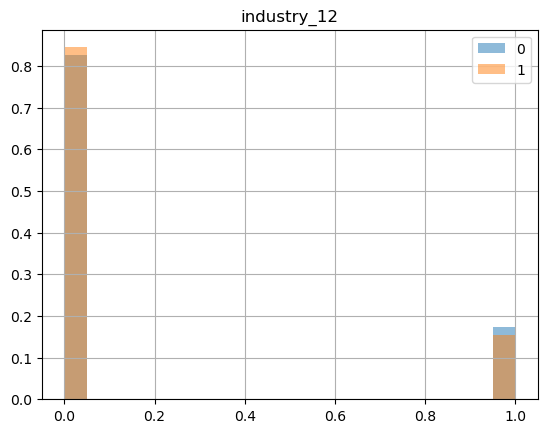

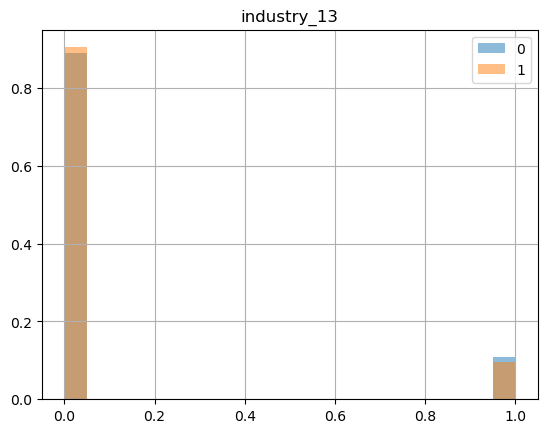

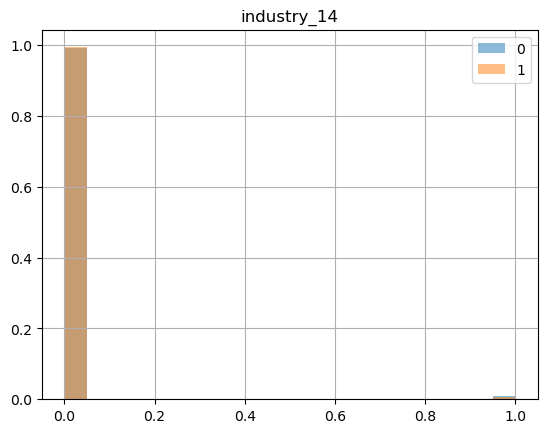

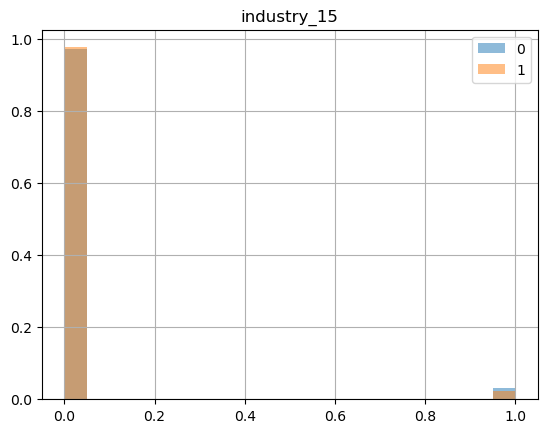

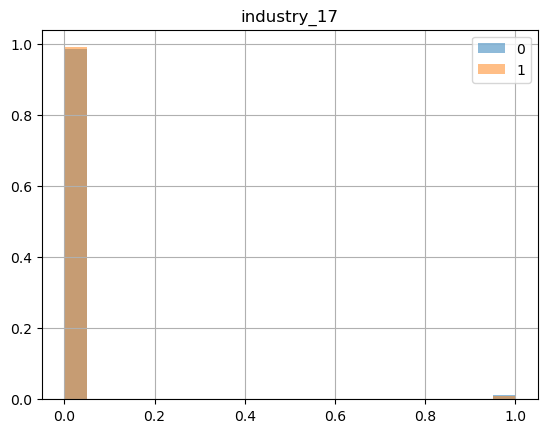

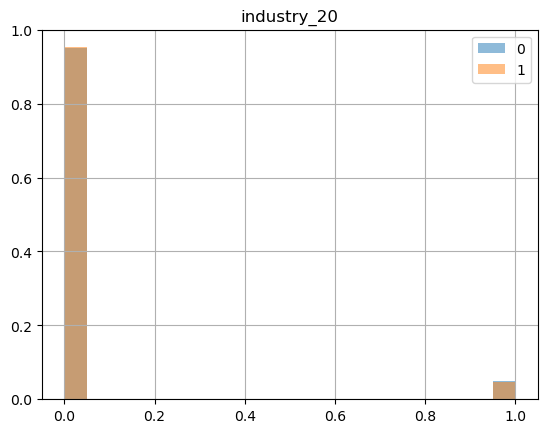

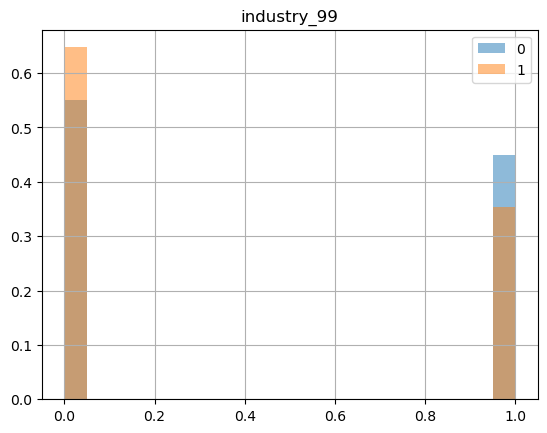

In [5]:
eda.plot_feature_distribution()

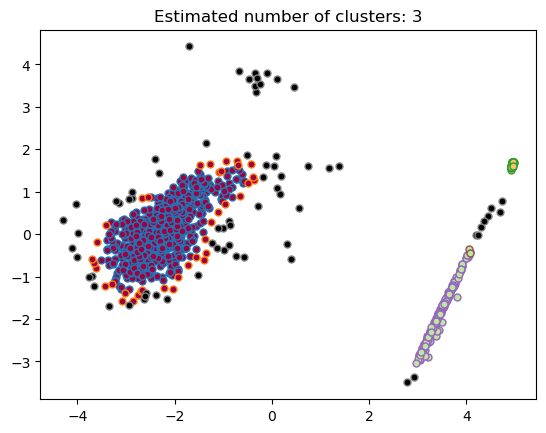

In [6]:
eda.run_customer_clustering()

[I 2023-03-31 10:49:15,133] A new study created in memory with name: LGBM optimization
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm

<Figure size 640x480 with 0 Axes>

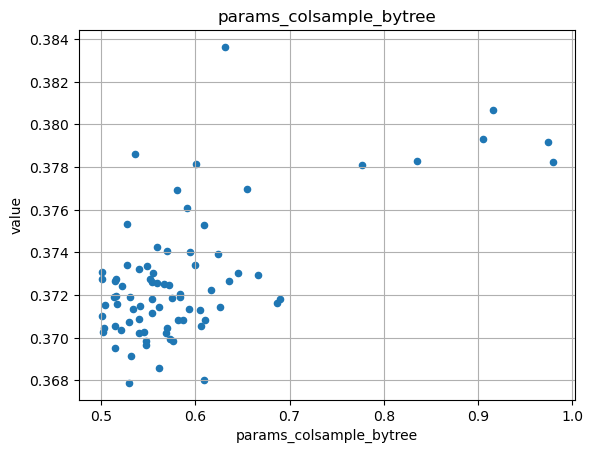

<Figure size 640x480 with 0 Axes>

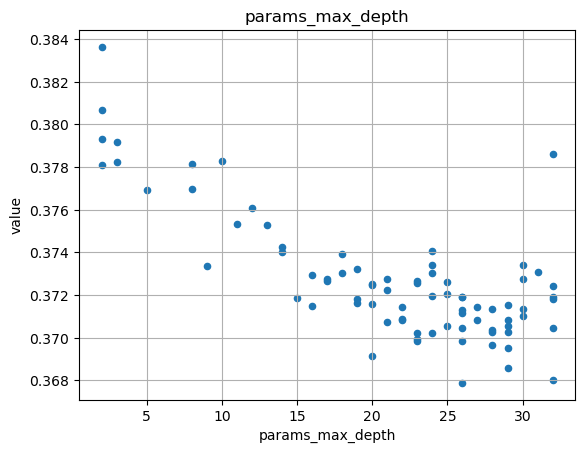

<Figure size 640x480 with 0 Axes>

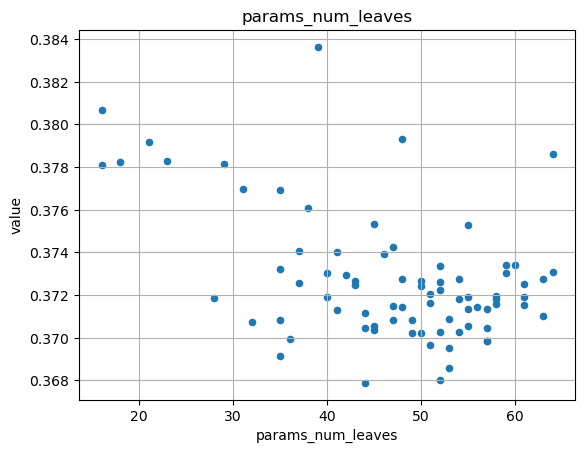

<Figure size 640x480 with 0 Axes>

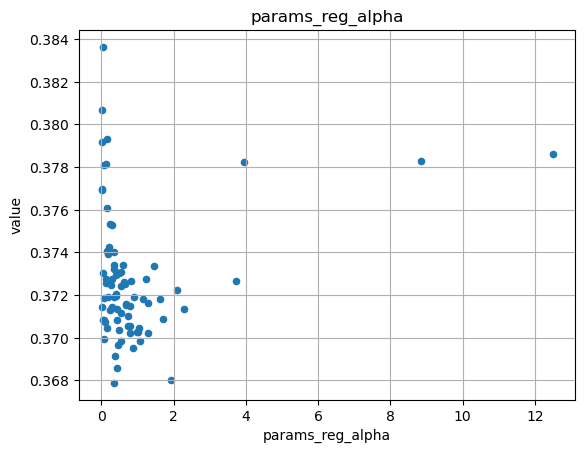

<Figure size 640x480 with 0 Axes>

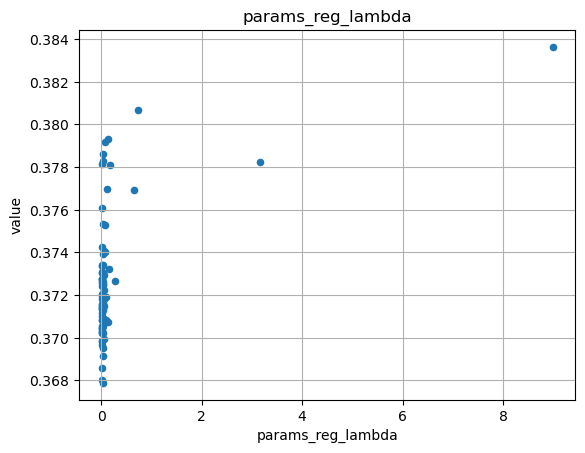

<Figure size 640x480 with 0 Axes>

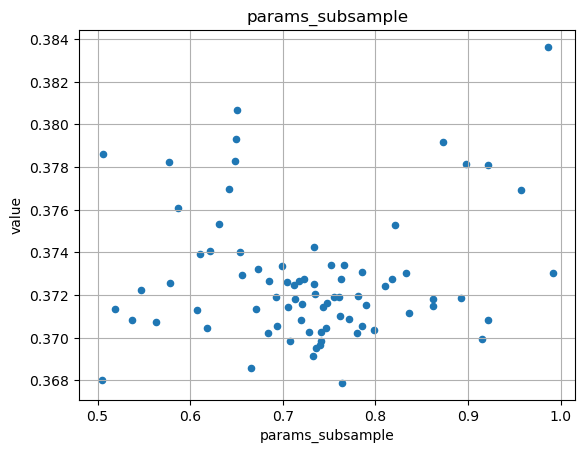

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categori

,Train,Validation,Test
Precision,0.904103,0.792336,0.827869
Recall,0.493253,0.369328,0.419087
F1,0.638243,0.501790,0.556474
Logloss,0.230318,0.367891,0.348900


,Pred_0,Pred_1
True_0,1334,21
True_1,140,101


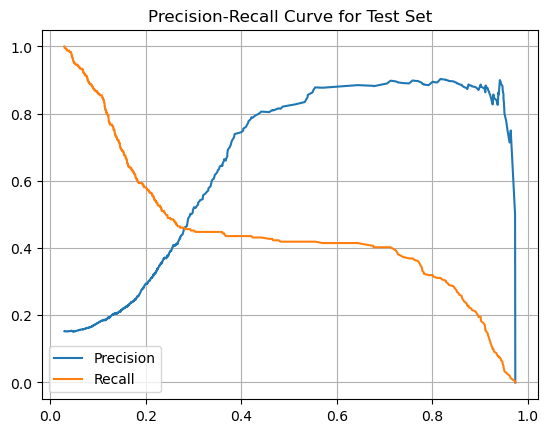

,feat,imp
0,age,8.5
1,yrs_of_relationship,7.9
2,total_aum,7.5
3,income,6.1
4,no_of_transaction,4.6
5,industry,4.2
6,sex,2.5
7,channel,2.4
8,with_product_b,1.3


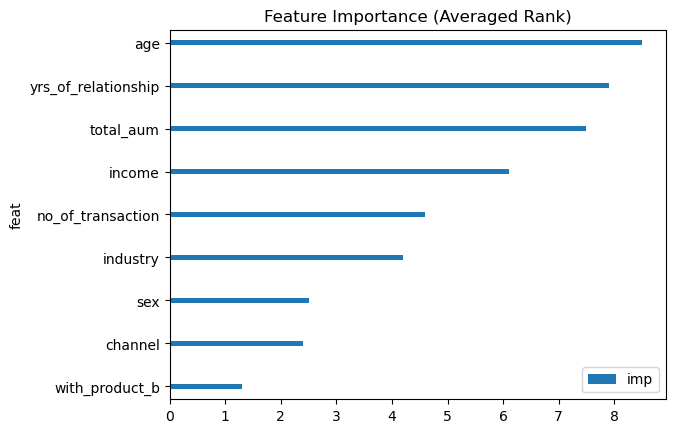

In [7]:
lgbm_model = LGBMModel(params, data)
lgbm_model.optimize_hp()
lgbm_model.visualize_hp_tune_results()
lgbm_model.train_lgbm_kfold(lgbm_model.best_params)
lgbm_model.evaluate_all()
lgbm_model.show_feature_importance()